# Machine Learning Model (1) - Linear Regression 

This notebook aims to apply a Machine Learning model, Linear Regression, on the following splitted datasets:
- new_train_data.csv
- splitted_train_data.csv
- splitted_cv_data.csv

This is to evaluate which of the chosen predictor variables in the original dataset is best at predicting the following response variables.

Predictor variables:
- Education
- Marital_Status
- HaveChild
- YearRange
- Income
- TotalChild
- NumWebVisitsMonth

Response variables:
- MntGroceryProducts
- TotalPurchase
- MntWines
- MntGoldProds

# Importing Relevant Modules

In [61]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

# References (under construction)

- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html (data-encoding-and-splitting.ipynb)

# Importing Data 

In [62]:
newCustomerData = pd.read_csv('dataset/customerData_Clean.csv')
newCustomerData

Unnamed: 0  Year_Birth   Education Marital_Status   Income  Kidhome  \
0              0        1957  Graduation         Single  58138.0        0   
1              1        1954  Graduation         Single  46344.0        1   
2              2        1965  Graduation        Married  71613.0        0   
3              3        1984  Graduation        Married  26646.0        1   
4              4        1981         PhD        Married  58293.0        1   
...          ...         ...         ...            ...      ...      ...   
2161        2161        1967  Graduation        Married  61223.0        0   
2162        2162        1946         PhD        Married  64014.0        2   
2163        2163        1981  Graduation       Divorced  56981.0        0   
2164        2164        1956      Master        Married  69245.0        0   
2165        2165        1954         PhD        Married  52869.0        1   

      Teenhome  Recency  MntWines  MntFruits  ...  NumWebPurchases  \
0            0       58       635         88  ...                8   
1            1       38        11          1  ...                1   
2            0       26       426         49  ...                8   
3            0       26        11          4  ...                2   
4            0       94       173         43  ...                5   
...        ...      ...       ...        ...  ...              ...   
2161         1       46       709         43  ...                9   
2162         1       56       406          0  ...                8   
2163         0       91       908         48  ...                2   
2164         1        8       428         30  ...                6   
2165         1       40        84          3  ...                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                      10                  4                  7   
1                       1                  2                  5   
2                       2                 10                  4   
3                       0                  4                  6   
4                       3                  6                  5   
...                   ...                ...                ...   
2161                    3                  4                  5   
2162                    2                  5                  7   
2163                    3                 13                  6   
2164                    5                 10                  3   
2165                    1                  4                  7   

      MntGroceryProducts  TotalPurchase  AcceptedCmp  YearRange  TotalChild  \
0                    806             25            1       1950           0   
1                      9              6            0       1950           2   
2                    287             21            0       1960           0   
3                     34              8            0       1980           1   
4                    207             19            0       1980           1   
...                  ...            ...          ...        ...         ...   
2161                 267             18            0       1960           1   
2162                  30             22            1       1940           3   
2163                 297             19            1       1980           0   
2164                 324             23            0       1950           1   
2165                  66             11            1       1950           2   

      HaveChild  
0             0  
1             1  
2             0  
3             1  
4             1  
...         ...  
2161          1  
2162          1  
2163          0  
2164          1  
2165          1  

[2166 rows x 25 columns]

In [63]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2166 non-null   int64  
 1   Year_Birth           2166 non-null   int64  
 2   Education            2166 non-null   object 
 3   Marital_Status       2166 non-null   object 
 4   Income               2166 non-null   float64
 5   Kidhome              2166 non-null   int64  
 6   Teenhome             2166 non-null   int64  
 7   Recency              2166 non-null   int64  
 8   MntWines             2166 non-null   int64  
 9   MntFruits            2166 non-null   int64  
 10  MntMeatProducts      2166 non-null   int64  
 11  MntFishProducts      2166 non-null   int64  
 12  MntSweetProducts     2166 non-null   int64  
 13  MntGoldProds         2166 non-null   int64  
 14  NumDealsPurchases    2166 non-null   int64  
 15  NumWebPurchases      2166 non-null   i

# Visualization (for reference)

This section only covers a small part of visualization involving the use of Seaborn heatmap and jointplot to examine the correlations between numerical response and predictor variables.

<AxesSubplot:>

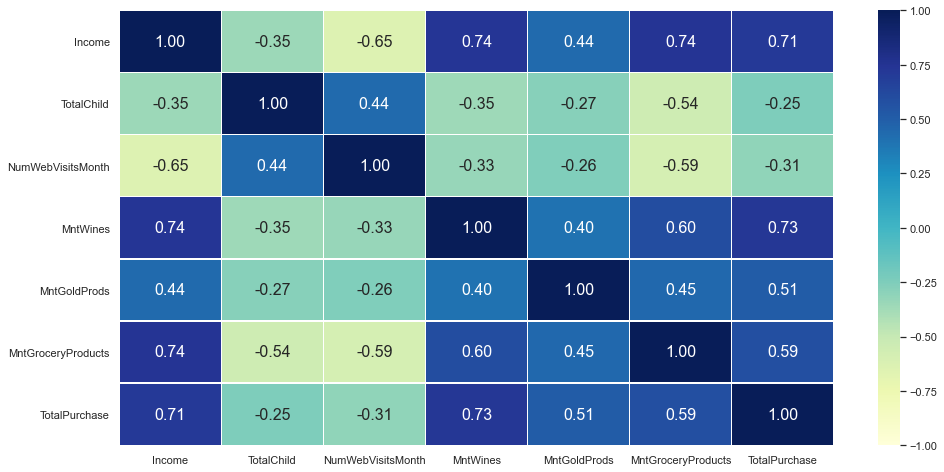

In [64]:
f = plt.figure(figsize=(16, 8))

sb.heatmap(newCustomerData[['Income','TotalChild','NumWebVisitsMonth',
                            'MntWines','MntGoldProds','MntGroceryProducts','TotalPurchase']].corr(), vmin = -1, vmax = 1, 
                            annot = True, annot_kws={"size": 16}, fmt=".2f", linewidths=.5, cmap="YlGnBu")

<Figure size 144x432 with 0 Axes>

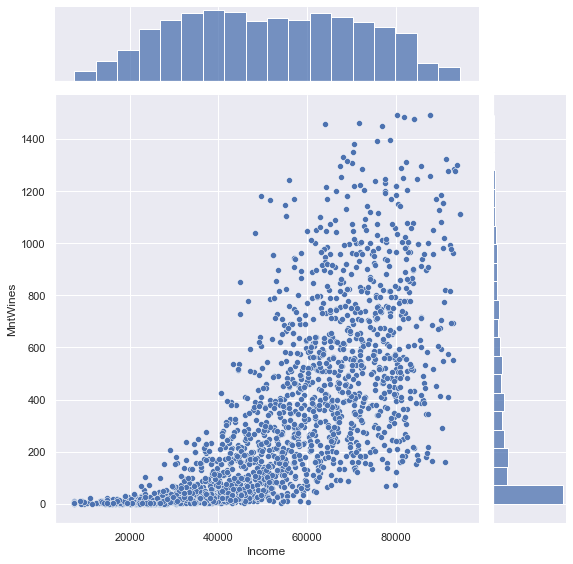

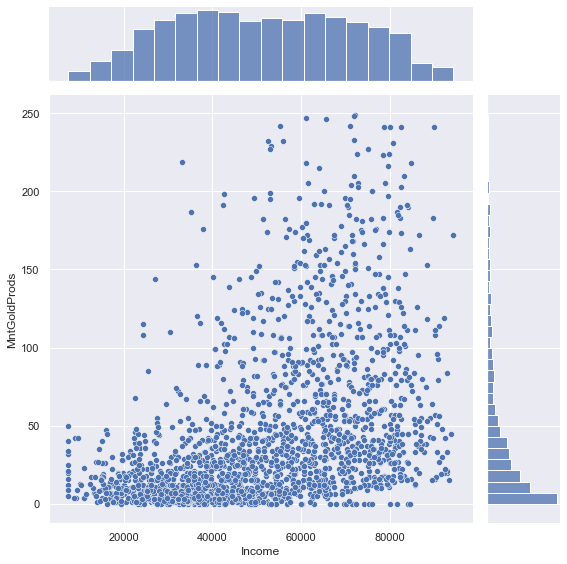

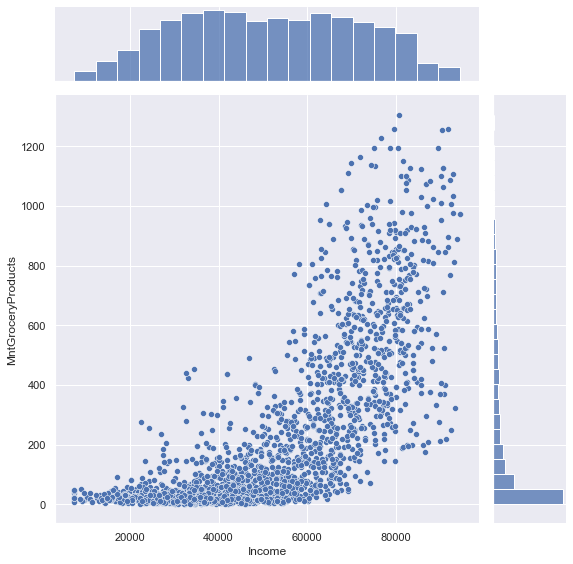

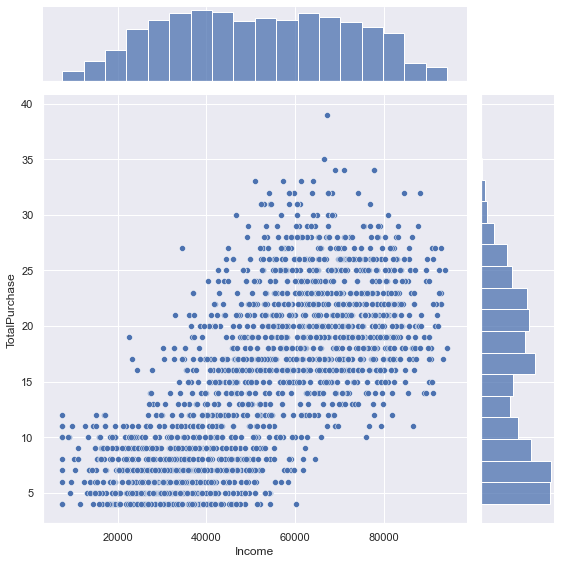

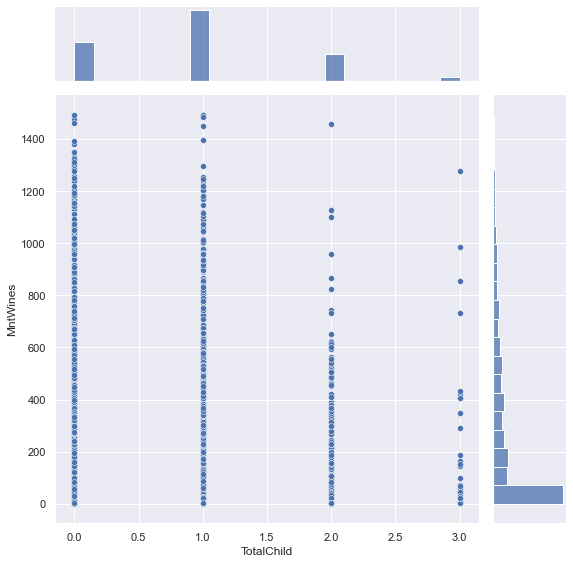

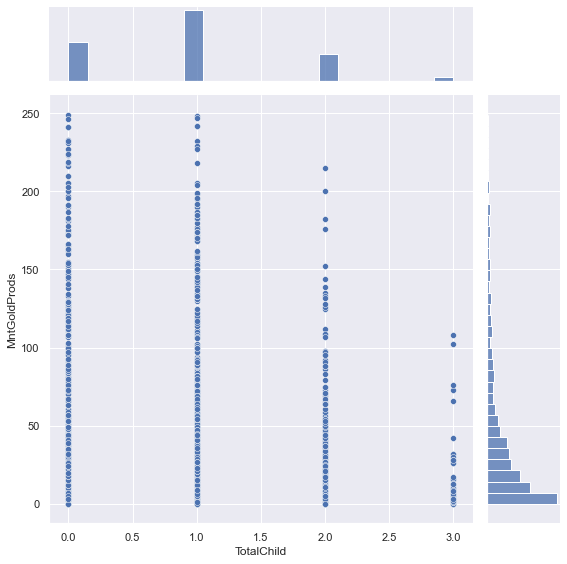

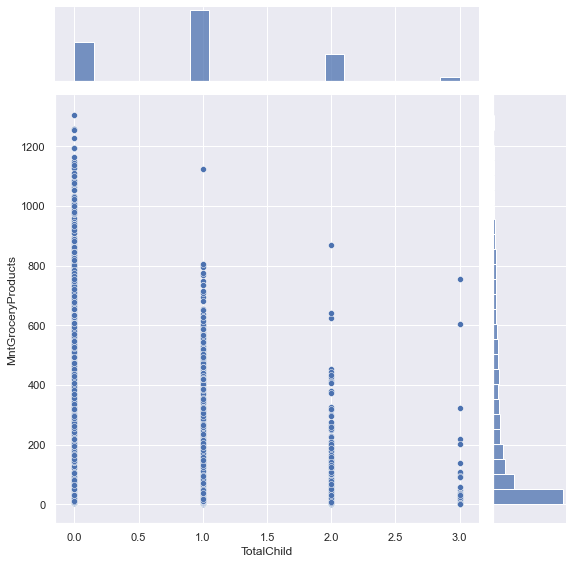

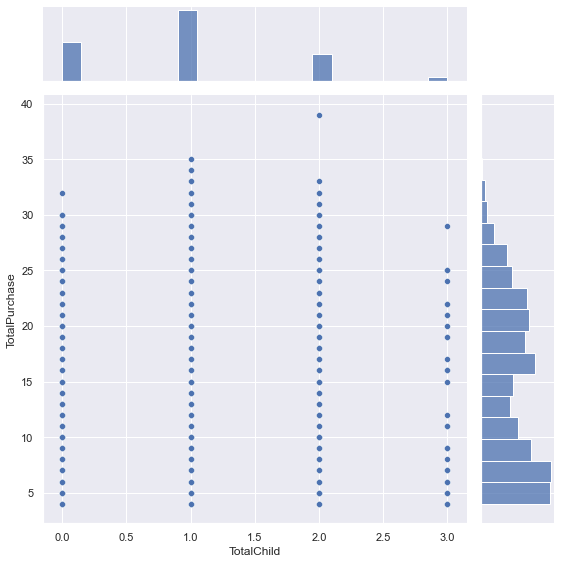

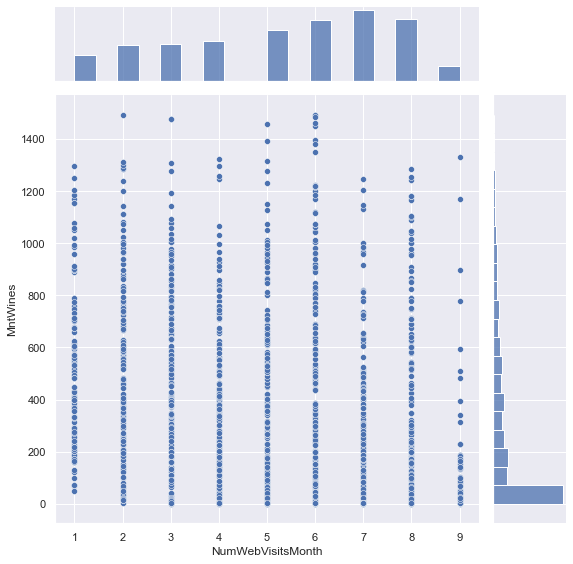

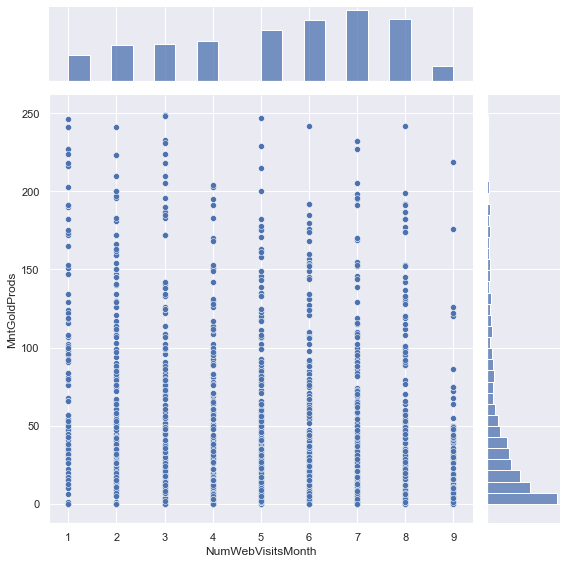

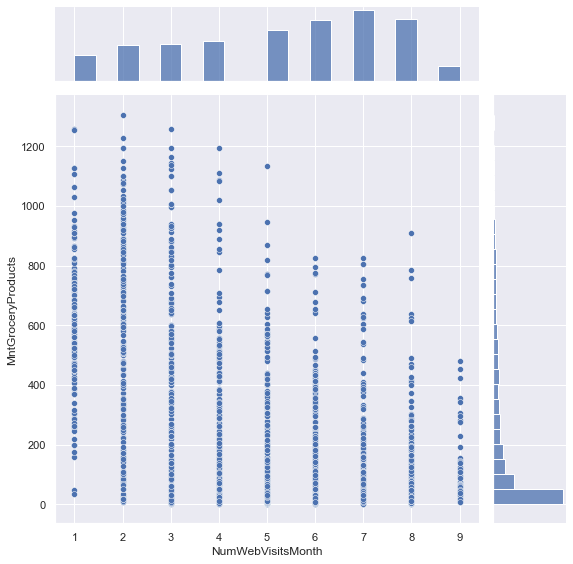

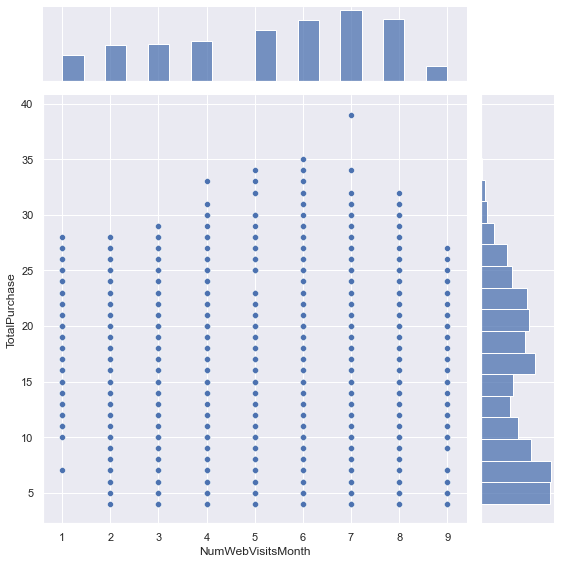

In [65]:
f = plt.figure(figsize=(2, 6))

# Predictor: Income
sb.jointplot(data = newCustomerData, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "TotalPurchase", height = 8)

# Predictor: TotalChild
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "TotalPurchase", height = 8)

# Predictor: NumWebVisitsMonth (can be treated as categorical variable too)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "TotalPurchase", height = 8)

# Formalizing Variable Types

In [66]:
newCustomerData['NumWebVisitsMonth'] = newCustomerData['NumWebVisitsMonth'].astype("category")
newCustomerData['YearRange'] = newCustomerData['YearRange'].astype("category")
newCustomerData['Dt_Customer'] = newCustomerData['Dt_Customer'].astype("datetime64[ns]")

KeyError: 'Dt_Customer'

In [ ]:
newCustomerData.info()

# Machine Learning

## Linear Regression

### 1a) train_test_split Method (numerical VS numerical variables)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def normal_splitting(X, Y):
    

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

In [ ]:
linreg1 = LinearRegression()
linreg1.fit(X_train, Y_train)

print('Intercept \t: b = ', linreg1.intercept_)
print('Coefficients \t: a = ', linreg1.coef_)

regline_x = X_train
regline_y = linreg1.intercept_ + linreg1.coef_ * X_train

# Predict Response corresponding to Predictors
Y_train_pred = linreg1.predict(X_train)
Y_test_pred = linreg1.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(X_train, Y_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'red', linewidth = 6)
axes[0].set_title("Regression Line on Train Set")

axes[1].scatter(X_test, Y_test, color = "green")
axes[1].scatter(X_test, Y_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")

for ax in axes.flat:
    ax.set(xlabel='Income', ylabel='MntGroceryProducts')

# Alternative:
# plt.subplot(1, 2, 1)
# plt.scatter(X_train, Y_train, color = "blue")
# plt.plot(regline_x, regline_y, 'red', linewidth = 6)
# plt.title("Regression Line on Train Set")
# plt.xlabel("Income")
# plt.ylabel("MntGroceryProducts")

# plt.subplot(1, 2, 2)
# plt.scatter(X_test, Y_test, color = "green")
# plt.scatter(X_test, Y_test_pred, color = "red")
# plt.title("Model Prediction on Test Set")
# plt.xlabel("Income")
# plt.ylabel("MntGroceryProducts")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
totalPurchases = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
income = pd.DataFrame(newCustomerData['Income']) # Predictor

# Split the Dataset into random Train and Test
income_train, income_test, totalPurchases_train, totalPurchases_test = train_test_split(income, totalPurchases, test_size = 0.2)

# Check the sample sizes
print("Train Set :", income_train.shape, totalPurchases_train.shape)
print("Test Set  :", income_test.shape, totalPurchases_test.shape)

In [ ]:
linreg2 = LinearRegression()
linreg2.fit(income_train, totalPurchases_train)

print('Intercept \t: b = ', linreg2.intercept_)
print('Coefficients \t: a = ', linreg2.coef_)

regline_x = income_train
regline_y = linreg2.intercept_ + linreg2.coef_ * income_train

# Predict Response corresponding to Predictors
totalPurchases_train_pred = linreg2.predict(income_train)
totalPurchases_test_pred = linreg2.predict(income_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(income_train, totalPurchases_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'red', linewidth = 6)
axes[0].set_title("Regression Line on Train Set")

axes[1].scatter(income_test, totalPurchases_test, color = "green")
axes[1].scatter(income_test, totalPurchases_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")

for ax in axes.flat:
    ax.set(xlabel='Income', ylabel='TotalPurchase')
    
# Alternative:
# plt.subplot(1, 2, 1)
# plt.scatter(income_train, totalPurchases_train, color = "blue")
# plt.plot(regline_x, regline_y, 'red', linewidth = 6)
# plt.title("Regression Line on Train Set")
# plt.xlabel("Income")
# plt.ylabel("TotalPurchase")

# plt.subplot(1, 2, 2)
# plt.scatter(income_test, totalPurchases_test, color = "green")
# plt.scatter(income_test, totalPurchases_test_pred, color = "red")
# plt.title("Model Prediction on Test Set")
# plt.xlabel("Income")
# plt.ylabel("TotalPurchase")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_train, totalPurchases_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_test, totalPurchases_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()

### 1b) train_test_split Method (numerical VS categorical variables)

Train Set : (1732, 7) (1732, 1)
Test Set  : (434, 7) (434, 1)
Model intercept:  [-302.97387533]
Variables: 
Response:  MntGroceryProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5788827745926886
Mean Squared Error (MSE) 	: 31748.721346838134

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5586349984014034
Mean Squared Error (MSE) 	: 35152.74371212847

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 31748.721346838134

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 35152.74371212847



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


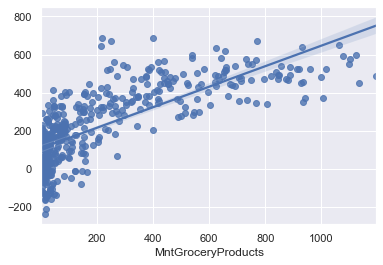

In [67]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 9) (1732, 1)
Test Set  : (434, 9) (434, 1)
Model intercept:  [-50.39861646]
Variables: 
Response:  MntGroceryProducts
Predictors:  NumWebVisitsMonth, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6092372820025242
Mean Squared Error (MSE) 	: 29460.245029006946

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.578844916990656
Mean Squared Error (MSE) 	: 33543.11429874537

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 29460.245029006946

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 33543.11429874537



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


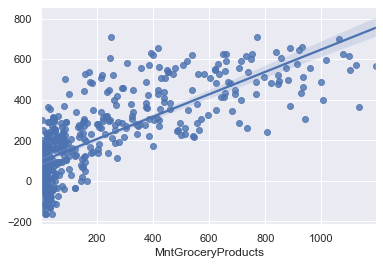

In [68]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['NumWebVisitsMonth']) # Predictor (Categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 1) (1732, 1)
Test Set  : (434, 1) (434, 1)
Model intercept:  [-298.25441918]
Variables: 
Response:  MntGroceryProducts
Predictors:  Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5599207226916438
Mean Squared Error (MSE) 	: 33178.301676610354

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5248941884934648
Mean Squared Error (MSE) 	: 37840.04795926517

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 33178.301676610354

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 37840.04795926517



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


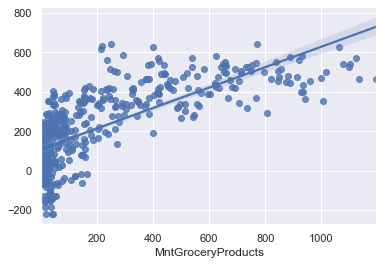

In [69]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor (Numerical)
# income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred)
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 9) (1732, 1)
Test Set  : (434, 9) (434, 1)
Model intercept:  [-7.2767911]
Variables: 
Response:  TotalPurchase
Predictors:  NumWebVisitsMonth, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5555524914943423
Mean Squared Error (MSE) 	: 25.111604844181798

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5853271905912352
Mean Squared Error (MSE) 	: 24.985223395625088

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 25.111604844181798

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 24.985223395625088



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


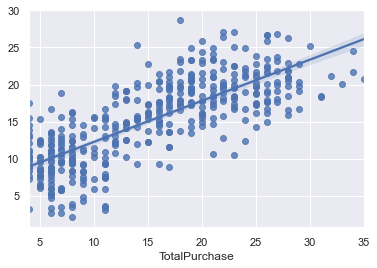

In [70]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData['NumWebVisitsMonth']) # Predictor (Categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 1) (1732, 1)
Test Set  : (434, 1) (434, 1)
Model intercept:  [1.14861816]
Variables: 
Response:  TotalPurchase
Predictors:  Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5068717131598661
Mean Squared Error (MSE) 	: 27.86210393720801

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5223938139224162
Mean Squared Error (MSE) 	: 28.777139430229276

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 27.86210393720801

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 28.777139430229276



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


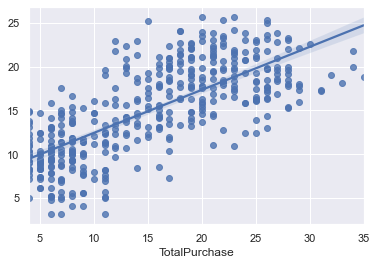

In [71]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor (numerical)
# income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred)
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 7) (1732, 1)
Test Set  : (434, 7) (434, 1)
Model intercept:  [1.49942206]
Variables: 
Response:  TotalPurchase
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5078235494007193
Mean Squared Error (MSE) 	: 27.80832450296832

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5231189932508101
Mean Squared Error (MSE) 	: 28.733445300518564

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 27.80832450296832

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 28.733445300518564



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


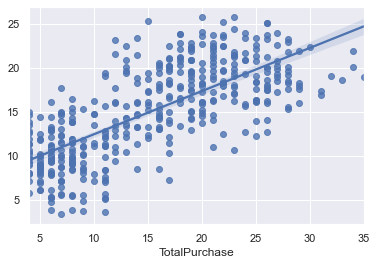

In [72]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 7) (1732, 1)
Test Set  : (434, 7) (434, 1)
Model intercept:  [-4.85681633]
Variables: 
Response:  MntGoldProds
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.23921092503975028
Mean Squared Error (MSE) 	: 1937.631618259537

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.19655497594597648
Mean Squared Error (MSE) 	: 2055.2142355827073

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1937.631618259537

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 2055.2142355827073



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


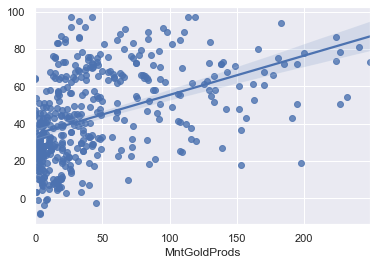

In [73]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGoldProds']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 7) (1732, 1)
Test Set  : (434, 7) (434, 1)
Model intercept:  [-396.29290021]
Variables: 
Response:  MntWines
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5607812430793125
Mean Squared Error (MSE) 	: 49439.46395650101

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5289947379654631
Mean Squared Error (MSE) 	: 54618.218365201166

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 49439.46395650101

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 54618.218365201166



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


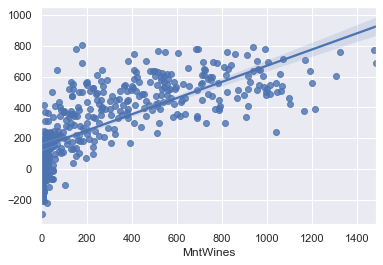

In [74]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntWines']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 7) (1732, 1)
Test Set  : (434, 7) (434, 1)
Model intercept:  [-253.10304748]
Variables: 
Response:  MntMeatProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5447965130224842
Mean Squared Error (MSE) 	: 20359.1648209722

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5093533867896389
Mean Squared Error (MSE) 	: 23774.68298628606

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 20359.1648209722

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 23774.68298628606



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


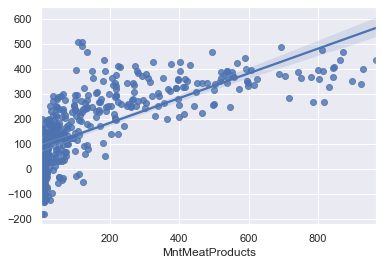

In [75]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntMeatProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 7) (1732, 1)
Test Set  : (434, 7) (434, 1)
Model intercept:  [-25.25188853]
Variables: 
Response:  MntFishProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3399285567205218
Mean Squared Error (MSE) 	: 1907.6993730026509

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3505978347357803
Mean Squared Error (MSE) 	: 1995.6494584927887

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1907.6993730026509

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1995.6494584927887



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


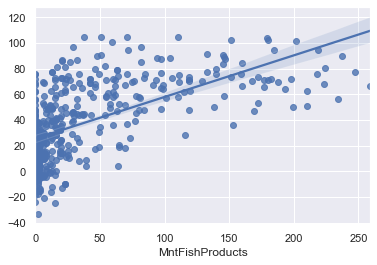

In [76]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntFishProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 7) (1732, 1)
Test Set  : (434, 7) (434, 1)
Model intercept:  [-19.53526685]
Variables: 
Response:  MntSweetProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3478735481714781
Mean Squared Error (MSE) 	: 1046.6223374969513

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3341543772678661
Mean Squared Error (MSE) 	: 1174.5768939257352

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1046.6223374969513

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1174.5768939257352



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


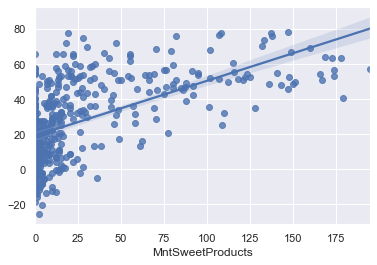

In [77]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntSweetProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1732, 7) (1732, 1)
Test Set  : (434, 7) (434, 1)
Model intercept:  [-24.61893932]
Variables: 
Response:  MntFruits
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.325748421992177
Mean Squared Error (MSE) 	: 1053.6382088602654

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31724851734810733
Mean Squared Error (MSE) 	: 1069.029929038145

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1053.6382088602654

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1069.029929038145



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


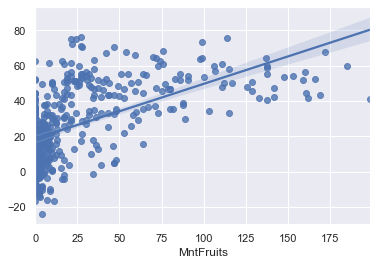

In [78]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntFruits']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

### 2) K-Fold Method 

In [79]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           2166 non-null   int64   
 1   Year_Birth           2166 non-null   int64   
 2   Education            2166 non-null   object  
 3   Marital_Status       2166 non-null   object  
 4   Income               2166 non-null   float64 
 5   Kidhome              2166 non-null   int64   
 6   Teenhome             2166 non-null   int64   
 7   Recency              2166 non-null   int64   
 8   MntWines             2166 non-null   int64   
 9   MntFruits            2166 non-null   int64   
 10  MntMeatProducts      2166 non-null   int64   
 11  MntFishProducts      2166 non-null   int64   
 12  MntSweetProducts     2166 non-null   int64   
 13  MntGoldProds         2166 non-null   int64   
 14  NumDealsPurchases    2166 non-null   int64   
 15  NumWebPurchases      

In [80]:
train_data = pd.read_csv('dataset/new_train_data.csv')
test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
train_data.drop(dropColumn,inplace= True,axis = 1)
test_data.drop(dropColumn,inplace= True,axis = 1)

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1751 non-null   int64  
 1   Education            1751 non-null   object 
 2   Marital_Status       1751 non-null   object 
 3   Complain             1751 non-null   int64  
 4   NumWebVisitsMonth    1751 non-null   int64  
 5   YearRange            1751 non-null   int64  
 6   HaveChild            1751 non-null   int64  
 7   AcceptedCmp          1751 non-null   int64  
 8   Income               1751 non-null   float64
 9   Kidhome              1751 non-null   int64  
 10  Teenhome             1751 non-null   int64  
 11  Dt_Customer          1751 non-null   object 
 12  Recency              1751 non-null   int64  
 13  MntWines             1751 non-null   int64  
 14  MntFruits            1751 non-null   int64  
 15  MntMeatProducts      1751 non-null   i

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           437 non-null    int64  
 1   Education            437 non-null    object 
 2   Marital_Status       437 non-null    object 
 3   Complain             437 non-null    int64  
 4   NumWebVisitsMonth    437 non-null    int64  
 5   YearRange            437 non-null    int64  
 6   HaveChild            437 non-null    int64  
 7   AcceptedCmp          437 non-null    int64  
 8   Income               437 non-null    float64
 9   Kidhome              437 non-null    int64  
 10  Teenhome             437 non-null    int64  
 11  Dt_Customer          437 non-null    object 
 12  Recency              437 non-null    int64  
 13  MntWines             437 non-null    int64  
 14  MntFruits            437 non-null    int64  
 15  MntMeatProducts      437 non-null    int

In [83]:
train_data['NumWebVisitsMonth'].describe()

count    1751.000000
mean        5.326670
std         2.273719
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: NumWebVisitsMonth, dtype: float64

In [84]:
test_data['NumWebVisitsMonth'].describe()

count    437.000000
mean       5.304348
std        2.169705
min        1.000000
25%        4.000000
50%        6.000000
75%        7.000000
max        9.000000
Name: NumWebVisitsMonth, dtype: float64

In [85]:
newCustomerData['NumWebVisitsMonth'].describe()

count     2166
unique       9
top          7
freq       386
Name: NumWebVisitsMonth, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

MODEL = LinearRegression()

def concatenator(cat_train, num_train):
    return pd.concat([cat_train, num_train], axis=1)

def encoder(splitted_data):
    return pd.get_dummies(data=splitted_data, drop_first=True)

def print_train_test(X_train, X_test, Y_train, Y_test):
    print("Train Set :", X_train.shape, Y_train.shape)
    print("Test Set  :", X_test.shape, Y_test.shape)

def univariate_kfold_linreg(train_response, train_predictor, var_type):
    Y_train = pd.DataFrame(train_response) # Response
    X_train = pd.DataFrame(train_predictor) # Predictor (Categorical)

    if var_type == "categorical":
        print(var_type)
        X_train = encoder(X_train)

    
    MODEL.fit(X_train,Y_train)
    return model, X_train, Y_train

def multivariate_kfold_linreg(train_response, train_cat_predictor, train_num_predictor):
    Y_train = pd.DataFrame(train_response) # Response
    cat_train = pd.DataFrame(train_cat_predictor) # Predictors (Categorical)
    num_train = pd.DataFrame(train_num_predictor) # Predictor (numercial)
    
    cat_train = encoder(cat_train)
    X_train = concatenator(cat_train, num_train) # For multi-variate linear regression with numerical predictor variable

    MODEL.fit(X_train,Y_train)
    return MODEL, X_train, Y_train

def results(model, X, Y):
    print("Model intercept: ", model.intercept_)

    predictions = model.predict(X)
    predictions

    sb.regplot(Y,predictions)

    Y_pred = model.predict(X)
     # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model.score(X, Y))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y, Y_pred))
    print("Residual Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(Y, Y_pred)))
    print()

    
response_var = ["MntGroceryProducts", "TotalPurchase", "MntWines", "MntGoldProds"]
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange"]
num_predictors = ["Income", "TotalChild", "NumWebVisitsMonth"]

# print_train_test(X_train, X_test, Y_train, Y_test)
# train_data[predictors].info()
#     for col_name in Y_train.columns:
#         response = col_name
#     for col_name in cat_train.columns:
#         cat_pred = col_name
#     print("Variables: ")
#     print("Response: ", response)
#     print("Predictors: ", cat_pred + ", Income")
#     print()

In [87]:
splitted_train_data = pd.read_csv('dataset/splitted_train_data.csv')
cv_data = pd.read_csv('dataset/splitted_cv_data.csv')
new_test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
splitted_train_data.drop(dropColumn,inplace= True,axis = 1)
cv_data.drop(dropColumn,inplace= True,axis = 1)
new_test_data.drop(dropColumn,inplace= True,axis = 1)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/splitted_train_data.csv'

Model intercept:  [-3522.21402622]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6898132546152927
Mean Squared Error (MSE) 	: 23857.687556775618
Residual Mean Squared Error (RMSE) 	: 154.45933949352371



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


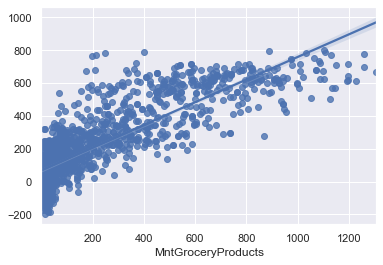

In [88]:
model, X_train, Y_train = multivariate_kfold_linreg(splitted_train_data[response_var[0]],
                                                    splitted_train_data[cat_predictors],
                                                     splitted_train_data[num_predictors])
results(model, X_train, Y_train)

Model intercept:  [-3522.21402622]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6929872806109255
Mean Squared Error (MSE) 	: 21228.557229973652
Residual Mean Squared Error (RMSE) 	: 145.7002307135224



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


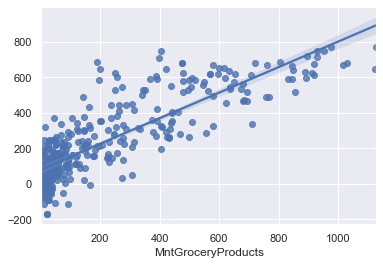

In [89]:
num_train = cv_data[num_predictors]
cat_train = encoder(cv_data[cat_predictors])
cv_X_train = concatenator(cat_train, num_train)

cv_Y_train = cv_data[response_var[0]]
results(model, cv_X_train, cv_Y_train)

Model intercept:  [-3522.21402622]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.652636344012288
Mean Squared Error (MSE) 	: 27323.48039496397
Residual Mean Squared Error (RMSE) 	: 165.29815605433708



C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


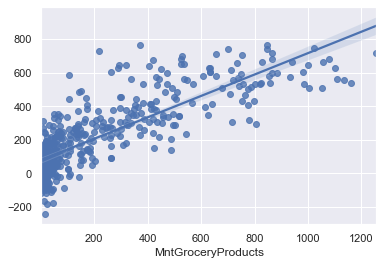

In [90]:
num_train = new_test_data[num_predictors]
cat_train = encoder(new_test_data[cat_predictors])
test_X_train = concatenator(cat_train, num_train)

test_Y_train = new_test_data[response_var[0]]
results(model, test_X_train, test_Y_train)

In [91]:
test_results(model, new_test_data, cv_data[response_var[0]])

NameError: name 'test_results' is not defined

In [92]:
test_results(model, X_test, cv_data[response_var[0]])

NameError: name 'test_results' is not defined

In [93]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[0]], test_data[response_var[0]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [94]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[1]], test_data[response_var[1]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [95]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[2]], test_data[response_var[2]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [96]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[3]], test_data[response_var[3]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [97]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[0]], test_data[response_var[0]], 
             train_data[num_predictors[0]], test_data[num_predictors[0]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [98]:
splitted_train_data = pd.read_csv('dataset/splitted_train_data.csv')
cv_data = pd.read_csv('dataset/splitted_cv_data.csv')
new_test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
splitted_train_data.drop(dropColumn,inplace= True,axis = 1)
cv_data.drop(dropColumn,inplace= True,axis = 1)
new_test_data.drop(dropColumn,inplace= True,axis = 1)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/splitted_train_data.csv'

In [99]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(splitted_train_data[response_var[0]], cv_data[response_var[0]], 
                     splitted_train_data[num_predictors[0]], cv_data[num_predictors[0]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [100]:
model, X_train, X_test = multivariate_kfold_linreg(splitted_train_data[response_var[0]], cv_data[response_var[0]], 
splitted_train_data[cat_predictors], cv_data[cat_predictors], 
             splitted_train_data[num_predictors], cv_data[num_predictors])
results(model, X_train, X_test, splitted_train_data[response_var[0]], new_test_data[response_var[0]])

TypeError: multivariate_kfold_linreg() takes 3 positional arguments but 6 were given

## Cross Validation

### Carrying out grid-search CV: choosing the best combination of parameters using explained variance

In [334]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# defining datasets
X_train = pd.read_csv('dataset/LLinear_Regression/X_train_lr.csv')
Y_train = pd.read_csv('dataset/Linear_Regression/Y_train_lr.csv')
Y_train = pd.DataFrame(Y_train['TotalPurchase'])
X_test = pd.read_csv('dataset/Linear_Regression/X_test_lr.csv')
Y_test = pd.read_csv('dataset/Linear_Regression/Y_test_lr.csv')
Y_test = pd.DataFrame(Y_test['TotalPurchase'])

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 17))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'explained_variance', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train)    

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/LLinear_Regression/X_train_lr.csv'

In [335]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.024266      0.006099         0.004663        0.005174   
1        0.021481      0.007256         0.002355        0.005015   
2        0.016507      0.003736         0.005224        0.005679   
3        0.019838      0.005023         0.003144        0.003854   
4        0.016732      0.002446         0.002508        0.003841   
5        0.018467      0.002701         0.005336        0.003577   
6        0.014618      0.005066         0.005486        0.007036   
7        0.014320      0.006323         0.001970        0.004712   
8        0.006146      0.007533         0.003242        0.006490   
9        0.014061      0.004687         0.001563        0.004688   
10       0.009538      0.005906         0.004717        0.006265   
11       0.012501      0.006250         0.000000        0.000000   
12       0.011015      0.006253         0.000800        0.002400   
13       0.004688      0.007161         0.004688        0.007160   
14       0.006362      0.004725         0.002818        0.003703   
15       0.006250      0.007655         0.003125        0.006250   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   
13                         14  {'n_features_to_select': 14}   
14                         15  {'n_features_to_select': 15}   
15                         16  {'n_features_to_select': 16}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.040743           0.055259           0.028851   
1            0.036520           0.096514           0.052513   
2            0.033567           0.207755           0.111754   
3            0.124074           0.214271           0.118574   
4            0.145355           0.239341           0.133148   
5            0.142553           0.237733           0.130806   
6            0.139572           0.249418           0.195176   
7            0.138174           0.246367           0.195814   
8            0.138068           0.246081           0.194170   
9            0.167185           0.243372           0.189607   
10           0.169221           0.246227           0.190601   
11           0.170313           0.244280           0.192220   
12           0.167695           0.244475           0.194500   
13           0.167849           0.244602           0.194385   
14           0.539745           0.606609           0.551976   
15           0.540585           0.607187           0.552192   

    split3_test_score  ...  split2_train_score  split3_train_score  \
0            0.009983  ...            0.028926            0.030739   
1            0.034485  ...            0.045300            0.047137   
2            0.150163  ...            0.127141            0.123041   
3            0.156492  ...            0.129193            0.125303   
4            0.181995  ...            0.144559            0.140176   
5            0.178820  ...            0.144709            0.141396   
6            0.178527  ...            0.171406            0.141432   
7            0.218003  ...            0.172574            0.171060   
8            0.219481  ...            0.173635            0.172062   
9  

### Visualising the results for the grid-search CV, finding that 15 is the optimal number of features

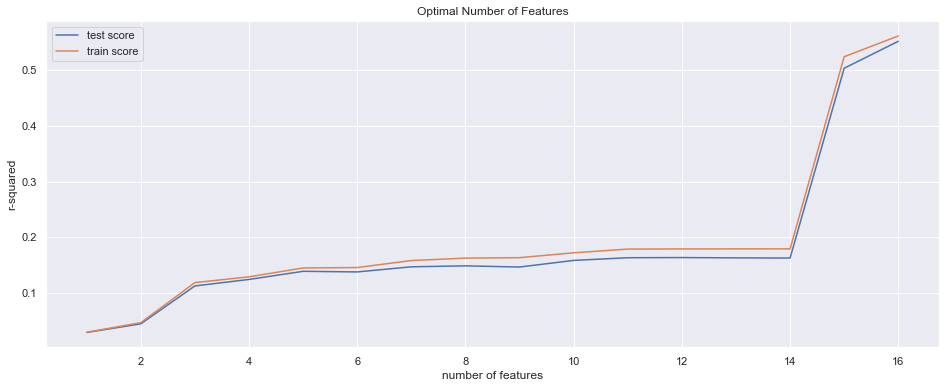

In [336]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [337]:
# final model
n_features_optimal = 16

# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, y_pred)
print(r2)

0.23709204291815122


### Changing the scoring metric of the GridSearchCV to MSE

In [338]:
model_cv1 = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, Y_train)
cv_results = pd.DataFrame(model_cv1.cv_results_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


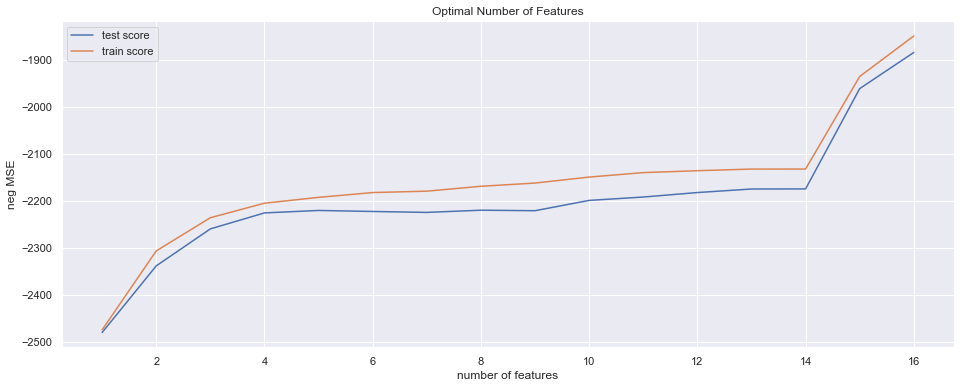

In [339]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('neg MSE')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [340]:
# final model
n_features_optimal = 15

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.mean_squared_error(Y_test, y_pred)
print("Normal linreg\t\t:",r2)

y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.mean_squared_error(Y_test, y_pred)
print("Improved correlation\t:",r2)

Normal linreg		: 2139.729955391603
Improved correlation	: 2135.9420543609754


### Repeating the above procedures for MntGroceryProducts, MntWines, MntGoldProds

Response: TotalPurchase
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Normal linreg (MSE)		: 23.899755831906155
After GSCV (MSE)		: 23.816337895441375
Normal linreg (r2)		: 0.5948363037088474
After GSCV (r2)			: 0.5962504570463443
____________________________________________________________________________________________________
Response: MntGroceryProducts
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Normal linreg (MSE)		: 26706.389343439125
After GSCV (MSE)		: 26741.15794673144
Normal linreg (r2)		: 0.6590509193568194
After GSCV (r2)			: 0.6586070434297775
____________________________________________________________________________________________________
Response: MntWines
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Normal linreg (MSE)		: 4186

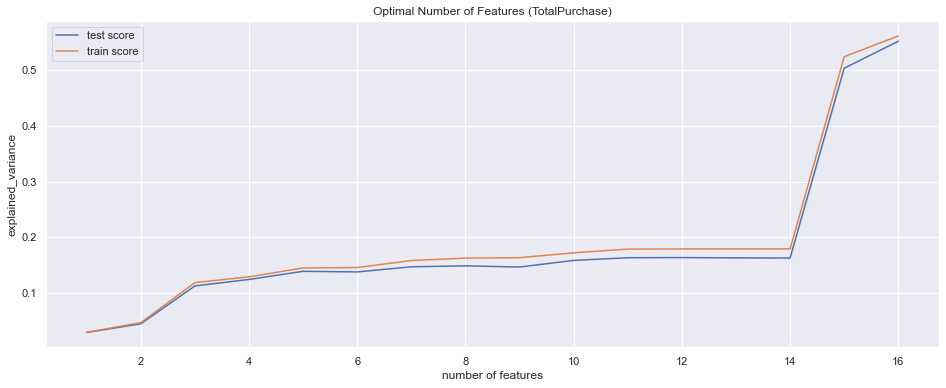

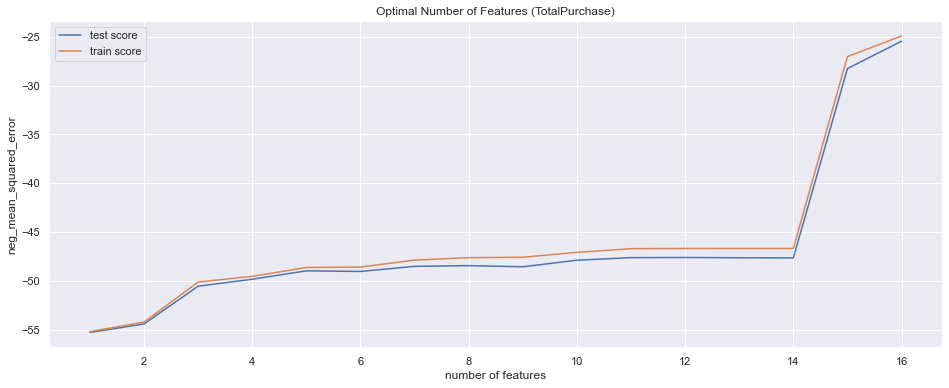

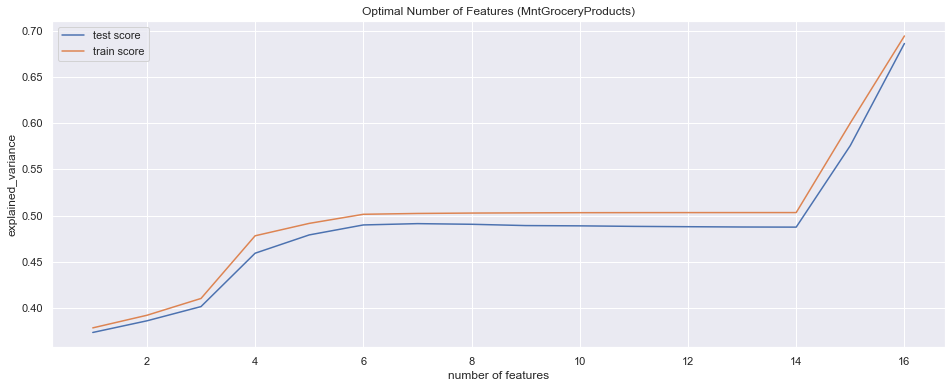

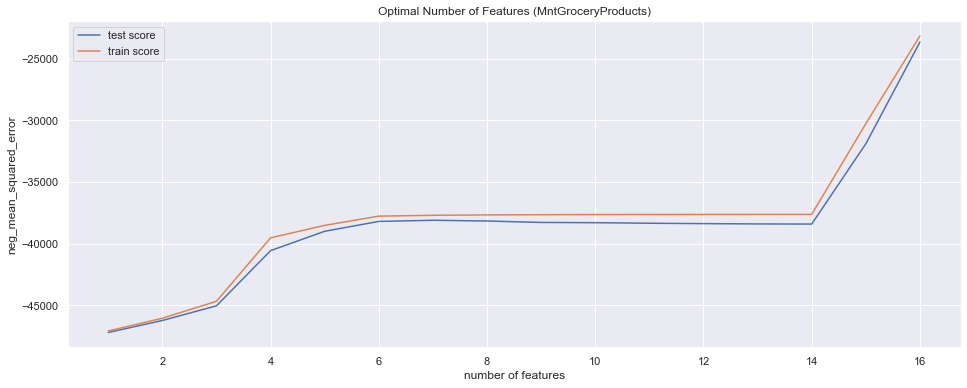

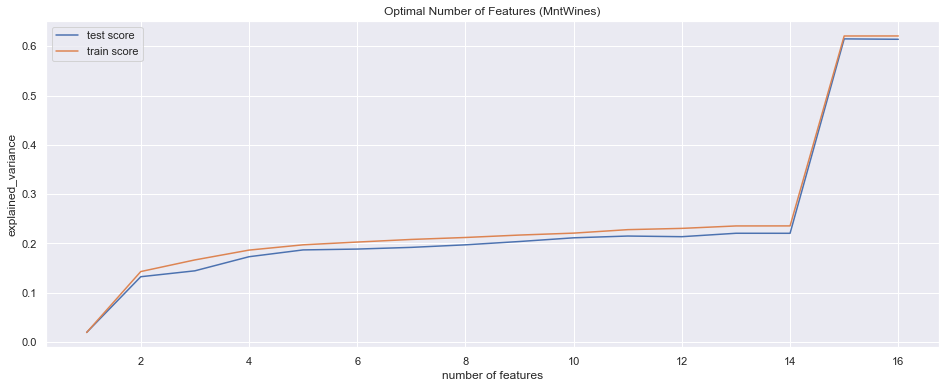

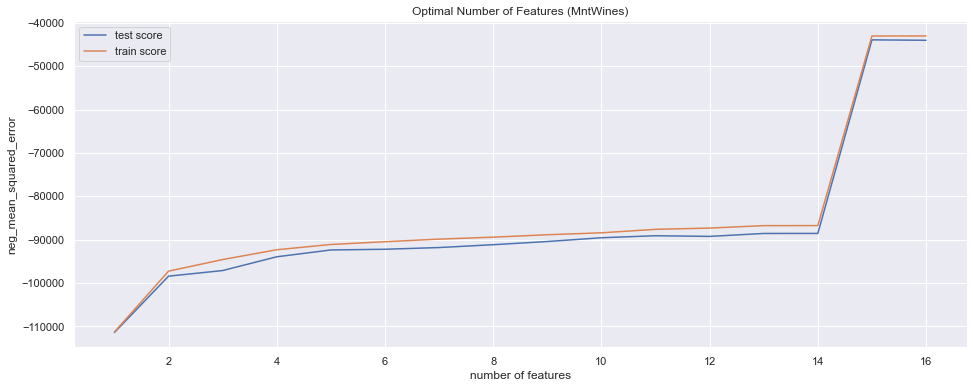

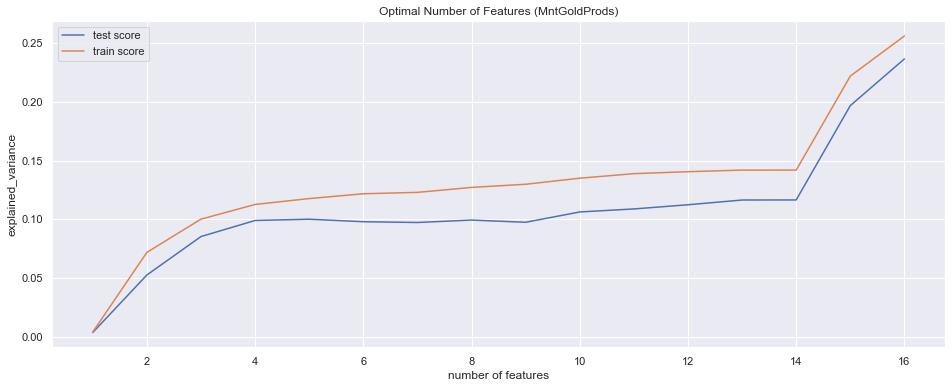

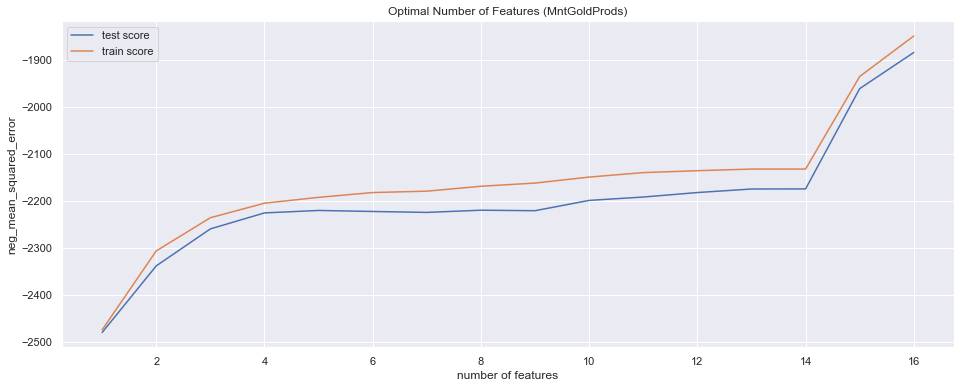

In [347]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# defining datasets
X_train = pd.read_csv('dataset/Linear_Regression/X_train_lr.csv')
X_test = pd.read_csv('dataset/Linear_Regression/X_test_lr.csv')


def GS(X_train, Y_train, num_split, scoring_metric):
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = num_split, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'n_features_to_select': list(range(1, 17))}]


    # step-3: perform grid search
    # 3.1 specify model
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    rfe = RFE(lm)             

    # 3.2 call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                            param_grid = hyper_params, 
                            scoring= scoring_metric, 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True)      

    # fit the model
    model_cv.fit(X_train, Y_train)
    
    return pd.DataFrame(model_cv.cv_results_)

def show_cv_results(cv_results, scoring_metric, response):
    plt.figure(figsize=(16,6))
    plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
    plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
    plt.xlabel('number of features')
    plt.ylabel(scoring_metric)
    plt.title("Optimal Number of Features ({})".format(response))
    plt.legend(['test score', 'train score'], loc='upper left')

def compare_metrics(X_train, Y_train, X_test, Y_test, n_features_optimal, metric):
    lm = LinearRegression()
    lm.fit(X_train, Y_train)

    rfe = RFE(lm, n_features_to_select=n_features_optimal)             
    rfe = rfe.fit(X_train, Y_train)

    if (metric == 'MSE'):
        # predict prices of X_test
        y_pred = lm.predict(X_test)
        r2 = sklearn.metrics.mean_squared_error(Y_test, y_pred)
        print("Normal linreg ({})\t\t:".format(metric),r2)

        y_pred = rfe.predict(X_test)
        r2 = sklearn.metrics.mean_squared_error(Y_test, y_pred)
        print("After GSCV ({})\t\t:".format(metric),r2)
    
    elif (metric == 'r2'):
        # predict prices of X_test
        y_pred = lm.predict(X_test)
        r2 = sklearn.metrics.r2_score(Y_test, y_pred)
        print("Normal linreg ({})\t\t:".format(metric),r2)

        y_pred = rfe.predict(X_test)
        r2 = sklearn.metrics.r2_score(Y_test, y_pred)
        print("After GSCV ({})\t\t\t:".format(metric),r2)


responses = ['TotalPurchase', 'MntGroceryProducts', 'MntWines', 'MntGoldProds']
scoring_metrics = ['explained_variance', 'neg_mean_squared_error']
for response in responses:
    Y_train = pd.read_csv('dataset/Linear_Regression/Y_train_lr.csv')
    Y_test = pd.read_csv('dataset/Linear_Regression/Y_test_lr.csv')
    Y_train = pd.DataFrame(Y_train[response])
    Y_test = pd.DataFrame(Y_test[response])
    print("Response:", response)
    
    for score in scoring_metrics:
        cv_results = GS(X_train, Y_train, 10, score)
        show_cv_results(cv_results, score, response)
    
    n_features_optimal = 15
    compare_metrics(X_train, Y_train, X_test, Y_test, n_features_optimal, 'MSE')
    compare_metrics(X_train, Y_train, X_test, Y_test, n_features_optimal, 'r2')
    print("_"*100)

    


### GridSearchCV improved: TotalPurchase, MntWines (marginally)